In [312]:
import pandas as pd #tablas https://pandas.pydata.org/docs/user_guide/pyarrow.html
import numpy as np #estadistica https://numpy.org/doc/1.25/user/index.html#user
import matplotlib.pyplot as plt #gráficos https://matplotlib.org/stable/plot_types/index.html
import seaborn as sns #gráficos https://seaborn.pydata.org/tutorial/regression.html
from sklearn import linear_model #modelo de regresion https://scikit-learn.org/stable/

Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [313]:
df = pd.read_csv('marketing_customer_analysis.csv')
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [314]:
(df["Income"] == 0).sum()
#LET'S CLEAN THE DATA

2317

In [315]:
#Substitute 0 by the median of income without the values that are 0
df["Income"] = df["Income"].replace(0, df[df["Income"] != 0]["Income"].median())
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,48081,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,48081,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,48081,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [316]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [317]:
numerical_columns= df.select_dtypes(include=[np.number])
numerical_columns.describe()


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.00000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,49853.97263,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,21023.08271,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,10037.00000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,34337.00000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,48081.00000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.00000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.00000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [318]:
categorical_columns = df.select_dtypes(include='object')
categorical_columns.describe()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,BU79786,California,No,Basic,Bachelor,1/10/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


Now we will try to check the normality of the numerical variables visually

Use seaborn library to construct distribution plots for the numerical variables

Use Matplotlib to construct histograms

Do the distributions for different numerical variables look like a normal distribution

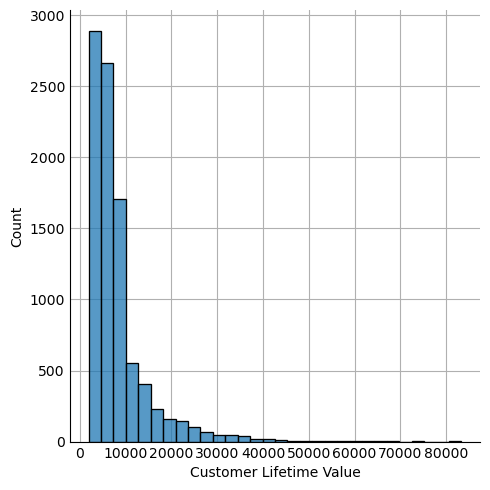

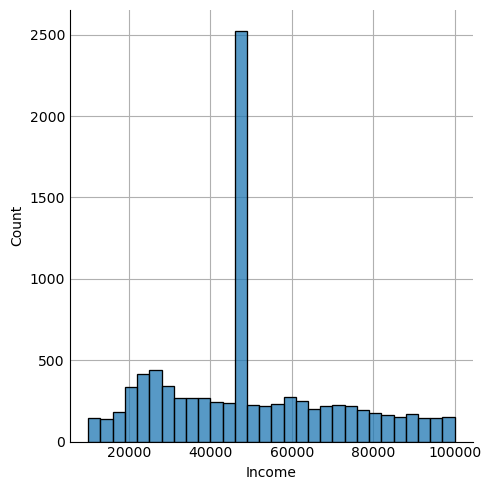

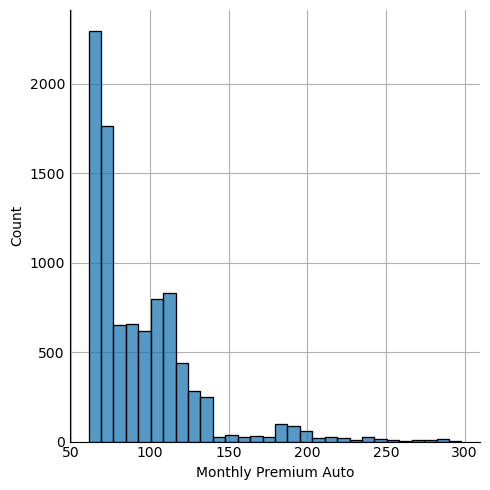

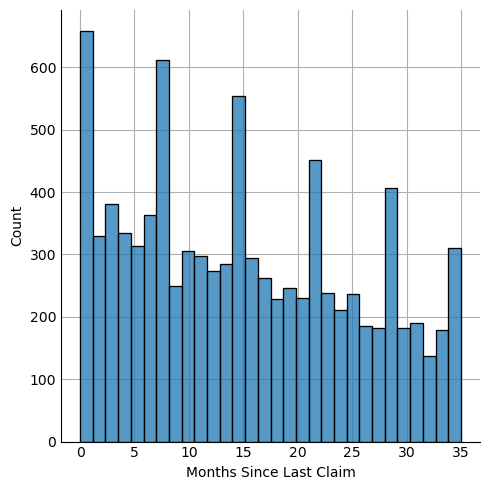

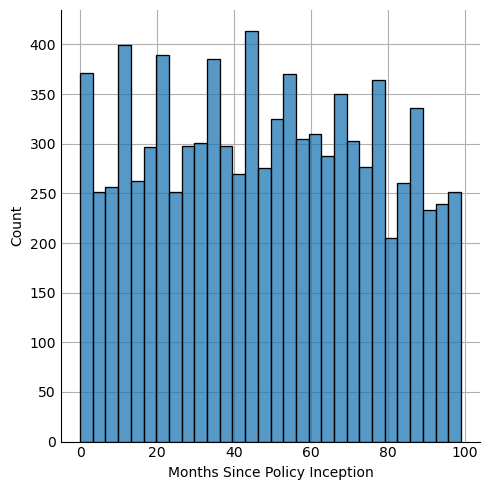

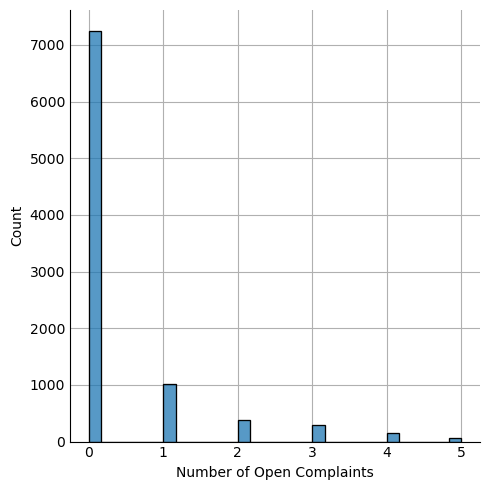

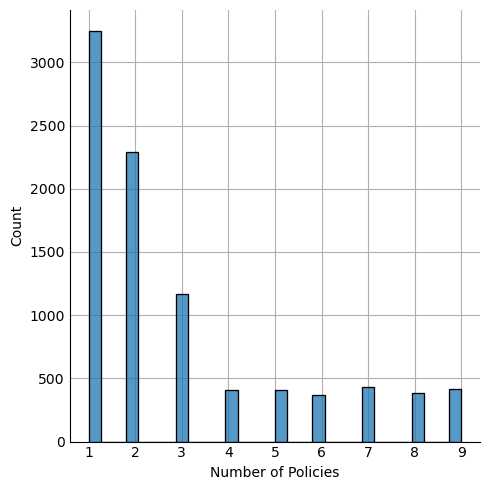

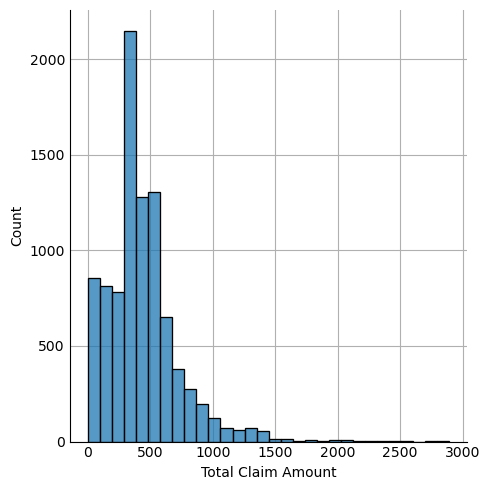

In [319]:
for column in numerical_columns:
    sns.displot(df[column], bins=30)
plt.show()


Text(0, 0.5, 'Frequency')

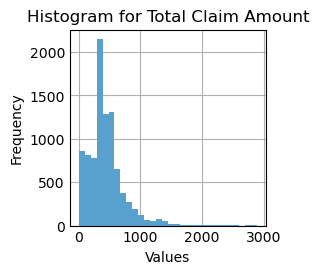

In [320]:
fig, ax = plt.subplots()
for colum in numerical_columns:
    ax.hist(df[column], bins=30)

ax.set_title(f'Histogram for {column}')
ax.set_xlabel('Values')
ax.set_ylabel('Frequency')


Income approaches to a normal distribution


For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

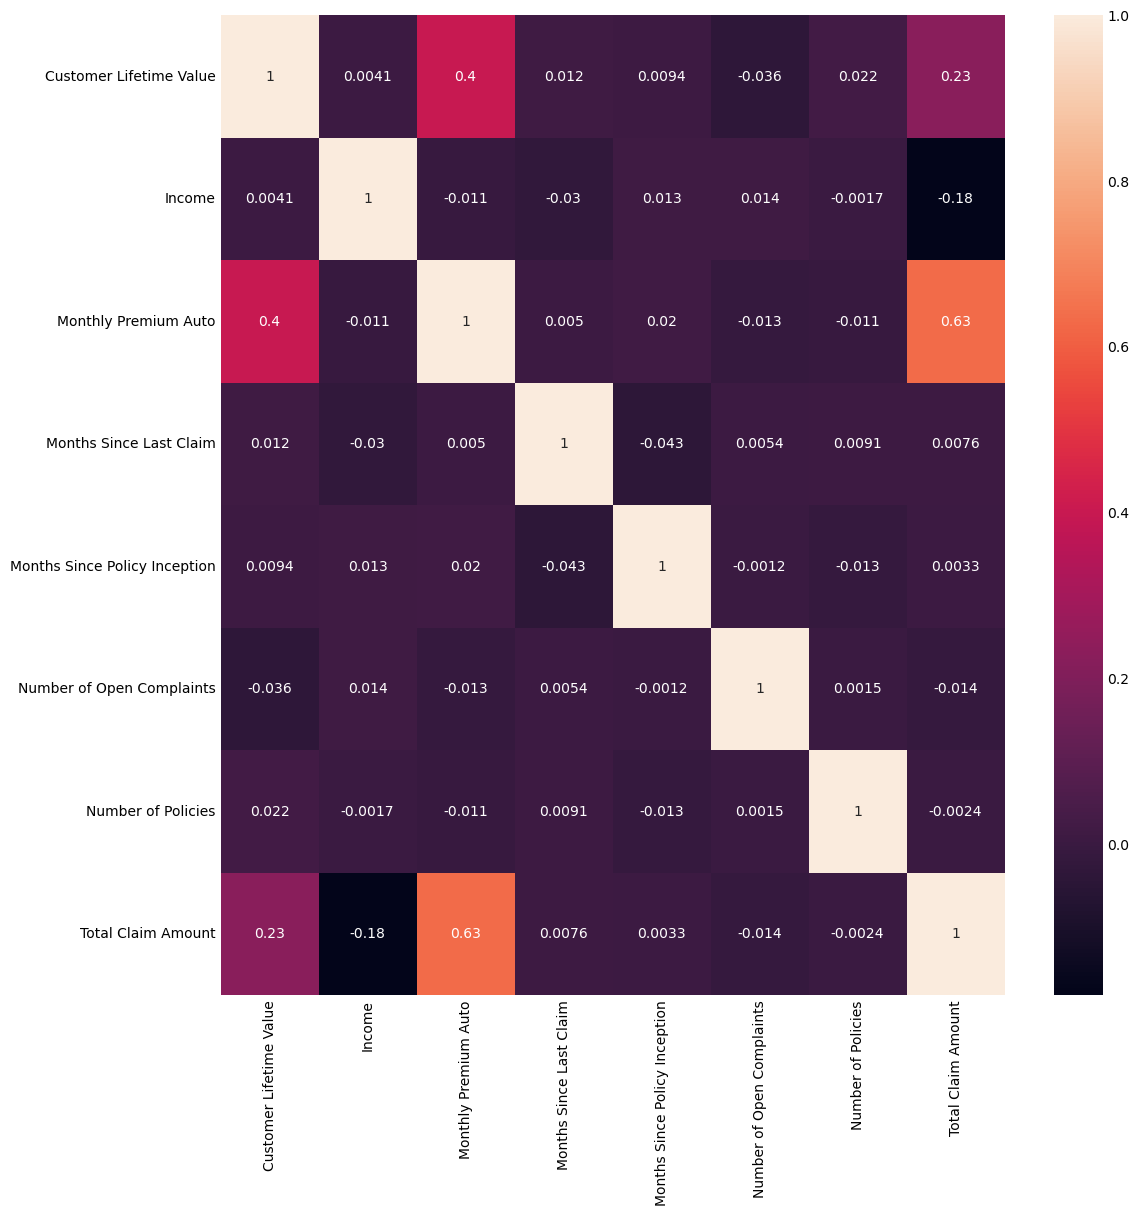

In [321]:
correlations_matrix = numerical_columns.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlations_matrix, annot=True)

plt.show()

Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

There is no variable that srtongly (>0.9) with total claim amounts

In [322]:
#Pseudo-code for doing it without the matrix
#Run all correlations
#Create a loop that check all correlation
#Drop the columns which correlations that are larger than 0.9



LAB 5

- X-y split.
- Normalize (numerical).

In [467]:
cat = numerical_columns #We only want the numerical columns (already filtered)
cat

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,48081,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,48081,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,48081,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [511]:
#According to our data, our interest in the variable we want to predict, should be Costumer Lifetime Value
#1. X-Y
y = cat['Customer Lifetime Value']
X = cat.drop(['Customer Lifetime Value'], axis=1)

#2.Normalize
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(X)
x_normalized = transformer.transform(X)
print(x_normalized.shape)
x_normalized
df_norm = pd.DataFrame(x_normalized, columns=X.columns)
df_norm


(9134, 7)


,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.514064,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0.422974,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.430601,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.422974,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.375778,0.050633,0.342857,0.444444,0.0,0.000,0.047710
...,...,...,...,...,...,...,...
9129,0.688250,0.050633,0.514286,0.898990,0.0,0.125,0.068485
9130,0.128602,0.075949,0.400000,0.282828,0.0,0.000,0.131034
9131,0.422974,0.101266,0.257143,0.373737,0.6,0.125,0.273297
9132,0.132349,0.147679,0.971429,0.030303,0.0,0.250,0.238876


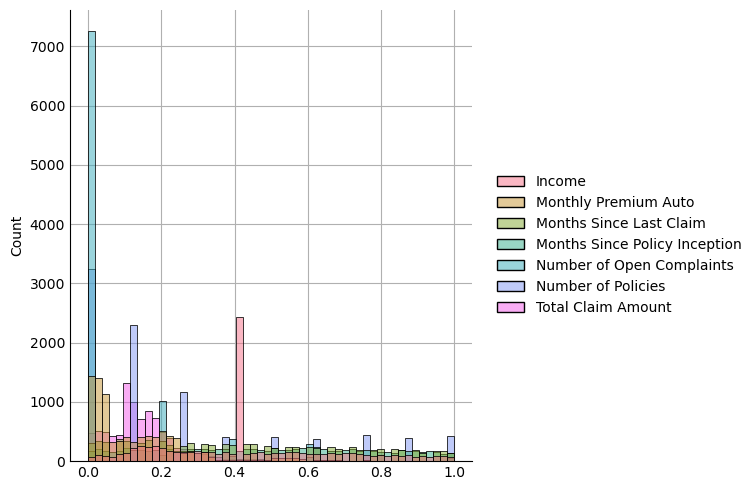

In [513]:
sns.displot(df_norm)
plt.show()

In [512]:
df_norm.corr()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Income,1.000000,-0.011368,-0.030122,0.012926,0.014039,-0.001677,-0.182833
Monthly Premium Auto,-0.011368,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,-0.030122,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.012926,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,0.014039,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,-0.001677,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,-0.182833,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000
